## Optimization and Classification Techniques for Manufacturing, Inventory Management, and Defect Prediction

Optimization and Simulation Projects: Utilized Particle Swarm Optimization (PSO) to minimize manufacturing costs by optimizing labor and machine resources, and applied Monte Carlo simulation to optimize inventory management, reducing customer wait times and product shelf times. Additionally, developed a widget classification model using Random Forest, identifying key features influencing defect prediction through feature importance analysis.

### Installing Dependencies 

In [1]:
%pip install pyswarm  # PySwarms is an extensible research toolkit for particle swarm optimization (PSO)  

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


### Importing libraries 

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from pyswarm import pso
import pandas as pd 

### Particle swarm optimization

This code demonstrates the use of Particle Swarm Optimization (PSO) to minimize the cost of a manufacturing process by optimizing the number of workers and machines.

1. **Objective Function**: The `manufacturing_cost` function calculates the total cost based on the number of workers and machines. It includes labor costs, machine costs, and a penalty if the production rate is lower than the target production.

2. **PSO Optimization**: The PSO algorithm is used to find the optimal combination of workers and machines that minimizes the total manufacturing cost. The bounds for the number of workers and machines are defined, and the PSO algorithm searches within these bounds to find the optimal solution.

3. **Results**: The optimal number of workers and machines is printed out, providing the solution that minimizes the manufacturing cost.

4. **Visualization**: A 3D surface plot is generated to visualize how the manufacturing cost varies with different combinations of workers and machines. The plot helps to understand the relationship between the number of resources and the overall cost, providing a clear picture of the cost landscape.

In [2]:
# Define the objective function for a manufacturing process.
def manufacturing_cost(x):
    """
    Objective function to minimize manufacturing costs.
    
    Parameters:
    x[0]: Number of workers
    x[1]: Number of machines
    
    Returns:
    total_cost: Total manufacturing cost, which includes labor costs, machine costs,
                and a penalty for not meeting the target production rate.
    """
    
    # Unpack the input values: number of workers and machines from the input vector x.
    workers, machines = x

    # Production parameters
    # production_rate: Calculated based on the number of workers and machines.
    # Each worker contributes to producing 10 units, while each machine can produce 15 units.
    # The production rate is limited by the lower bound (minimum) of the worker or machine capacity.
    production_rate = min(workers * 10, machines * 15)  # Simplified throughput model

    # Define the target production output that needs to be achieved. If the production rate
    # is lower than this target, a penalty will be applied.
    target_production = 1000  # Target production output in units

    # Cost parameters
    # labor_cost: The total labor cost is the number of workers multiplied by the daily wage of 20.
    labor_cost = workers * 20  # Cost per worker per day
    
    # machine_cost: The total cost of operating machines is the number of machines multiplied by the daily rate of 50.
    machine_cost = machines * 50  # Cost per machine per day

    # penalty_cost: If the production rate is below the target, a penalty is applied for every unit short of the target.
    # The penalty cost is proportional to the shortfall in production, with a penalty rate of 100 per unit.
    penalty_cost = 0 if production_rate >= target_production else (target_production - production_rate) * 100

    # total_cost: The overall manufacturing cost, combining labor, machine, and penalty costs (if applicable).
    total_cost = labor_cost + machine_cost + penalty_cost
    
    # Return the total cost, which will be minimized by the optimization algorithm.
    return total_cost


In [3]:
# Set the bounds for the number of workers and machines.
# These bounds define the search space for the optimization algorithm.

lb = [1, 1]  # Lower bounds: At least 1 worker and 1 machine are required.
ub = [100, 50]  # Upper bounds: A maximum of 100 workers and 50 machines are allowed.


In [4]:
# Run PSO to minimize the manufacturing cost.
# The pso function applies Particle Swarm Optimization to find the optimal number of workers and machines.

opt_solution, _ = pso(manufacturing_cost, lb, ub, swarmsize=30, maxiter=50)

# Extract the optimal number of workers and machines from the solution.
opt_workers, opt_machines = opt_solution


Stopping search: Swarm best objective change less than 1e-08


In [5]:
# Display the optimal results.
print(f"Optimal number of workers: {opt_workers:.2f}")
print(f"Optimal number of machines: {opt_machines:.2f}")

Optimal number of workers: 75.00
Optimal number of machines: 50.00


In [6]:
# Visualization
workers_range = np.linspace(1, 100, 50)
machines_range = np.linspace(1, 50, 50)
workers_grid, machines_grid = np.meshgrid(workers_range, machines_range)
cost_grid = np.zeros_like(workers_grid)


In [7]:
# Calculate cost for the grid
for i in range(workers_grid.shape[0]):
    for j in range(workers_grid.shape[1]):
        cost_grid[i, j] = manufacturing_cost([workers_grid[i, j], machines_grid[i, j]])


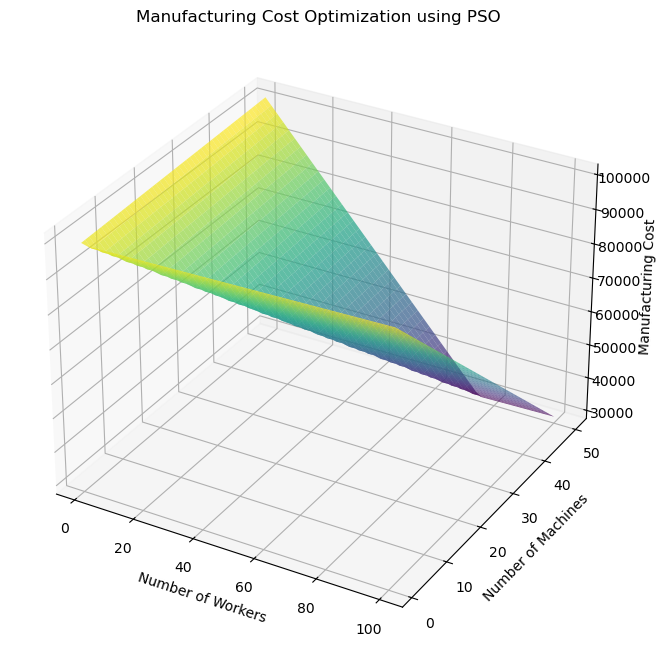

In [8]:
# Plot the cost surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(workers_grid, machines_grid, cost_grid, cmap='viridis', alpha=0.7)
ax.set_xlabel('Number of Workers')
ax.set_ylabel('Number of Machines')
ax.set_zlabel('Manufacturing Cost')
ax.set_title('Manufacturing Cost Optimization using PSO')
plt.show()

This code demonstrates the use of Particle Swarm Optimization (PSO) to minimize the cost of a manufacturing process by optimizing the number of workers and machines.

1. **Objective Function**: The `manufacturing_cost` function calculates the total cost based on the number of workers and machines. It includes labor costs, machine costs, and a penalty if the production rate is lower than the target production.

2. **PSO Optimization**: The PSO algorithm is used to find the optimal combination of workers and machines that minimizes the total manufacturing cost. The bounds for the number of workers and machines are defined, and the PSO algorithm searches within these bounds to find the optimal solution.

3. **Results**: The optimal number of workers and machines is printed out, providing the solution that minimizes the manufacturing cost.

4. **Visualization**: A 3D surface plot is generated to visualize how the manufacturing cost varies with different combinations of workers and machines. The plot helps to understand the relationship between the number of resources and the overall cost, providing a clear picture of the cost landscape.

### Monte Carlo Simulation


In [9]:
# Constants

LEAD_TIME_WEEKS = 4
# The time it takes for a restock order to arrive, measured in weeks (4 weeks).
# This is a typical lead time for replenishing inventory.

LEAD_TIME_DAYS = LEAD_TIME_WEEKS * 7
# Convert the lead time into days, since the simulation runs on a daily basis.
# 1 week = 7 days, so for a 4-week lead time, this is 28 days.

MAX_SHELF_TIME = 3
# The maximum number of days a product can stay on the shelf before it's considered old.
# This is used to track the shelf life of products in the inventory.

MAX_WAIT_TIME = 3
# The maximum number of days a customer is willing to wait for a product if it's out of stock.
# If a customer has to wait longer than this, they may cancel the order.

PRODUCT_COST = 25000
# The cost of a single product in the inventory. This could represent the wholesale price or cost to the company.

SIMULATION_DAYS = 365
# The number of days the simulation will run. In this case, we are simulating one year of operations (365 days).

NUM_SIMULATIONS = 1000
# The number of Monte Carlo simulations to run. Running multiple simulations allows for the analysis of a range of outcomes,
# providing a better understanding of the variability in inventory performance over time.


In [10]:
# Demand Parameters

daily_demand_prob = 0.1  
# The probability that a customer will place an order on any given day.
# A value of 0.1 means there is a 10% chance that a customer will place an order each day.
# This parameter is crucial for simulating customer demand in the inventory management model,
# as it influences how often products need to be restocked and how inventory levels fluctuate.


In [11]:
# Monte Carlo Simulation
def monte_carlo_inventory_simulation():
    # Lists to store results for each simulation
    inventory_levels = []  # Final inventory level at the end of the simulation
    customer_wait_times = []  # Average wait time for customers who had to wait for restocking
    shelf_times = []  # Average shelf time for products that were sold

    # Run the specified number of simulations
    for sim in range(NUM_SIMULATIONS):
        # Initialize variables for the simulation
        inventory = 0  # Current inventory level
        days_until_restock = 0  # Countdown until the next restock arrives
        total_shelf_time = 0  # Total time products spent on the shelf
        total_wait_time = 0  # Total wait time for customers
        total_orders = 0  # Total number of orders placed during the simulation

        # Simulate for the specified number of days
        for day in range(SIMULATION_DAYS):
            # Simulate whether a customer places an order based on the daily demand probability
            customer_order = np.random.rand() < daily_demand_prob

            if customer_order:
                if inventory > 0:
                    # If there is inventory available, fulfill the order
                    inventory -= 1  # Reduce the inventory by one
                    # Add the time the product spent on the shelf (up to MAX_SHELF_TIME)
                    total_shelf_time += min(MAX_SHELF_TIME, days_until_restock)
                else:
                    # If there is no inventory, the customer has to wait for restocking
                    total_wait_time += LEAD_TIME_DAYS  # Add the lead time as wait time
                total_orders += 1  # Increment the total number of orders

            # Restocking logic: decrease the countdown until the next restock
            if days_until_restock > 0:
                days_until_restock -= 1

            # Check if we need to restock
            if inventory == 0 and days_until_restock == 0:
                # Place a new order to restock inventory
                inventory += 1  # Increment the inventory as we order one new product
                days_until_restock = LEAD_TIME_DAYS  # Reset the countdown until restock

        # Store simulation results for this iteration
        inventory_levels.append(inventory)  # Final inventory level after all days
        customer_wait_times.append(total_wait_time / max(1, total_orders))  # Average wait time
        shelf_times.append(total_shelf_time / max(1, total_orders))  # Average shelf time

    # Return the results of all simulations
    return inventory_levels, customer_wait_times, shelf_times


In [12]:
# Run the simulation
inventory_levels, customer_wait_times, shelf_times = monte_carlo_inventory_simulation()

In [13]:
# Visualize the results
def visualize_results(customer_wait_times, shelf_times):
    plt.figure(figsize=(12, 6))

    # Plot customer wait times
    plt.subplot(1, 2, 1)
    plt.hist(customer_wait_times, bins=20, color='skyblue', edgecolor='black')
    plt.xlabel('Average Customer Wait Time (Days)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Average Customer Wait Times')

    # Plot shelf times
    plt.subplot(1, 2, 2)
    plt.hist(shelf_times, bins=20, color='lightgreen', edgecolor='black')
    plt.xlabel('Average Shelf Time (Days)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Average Shelf Times')

    plt.tight_layout()
    plt.show()

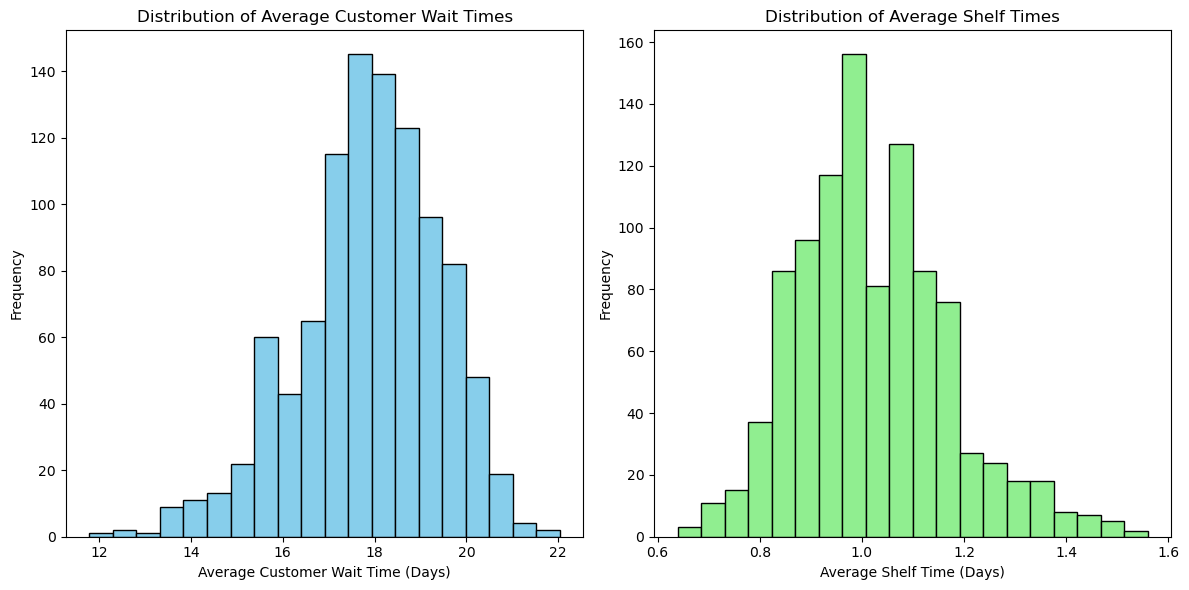

In [14]:
visualize_results(customer_wait_times, shelf_times)

In [17]:
# Display summary metrics
wait_time_df = pd.DataFrame({'Customer Wait Time': customer_wait_times, 'Shelf Time': shelf_times})
print(wait_time_df.describe())

       Customer Wait Time   Shelf Time
count         1000.000000  1000.000000
mean            17.906503     1.019903
std              1.557401     0.148340
min             11.789474     0.639344
25%             16.969697     0.916667
50%             18.117647     1.000000
75%             19.121951     1.114286
max             22.032787     1.560000


The code simulates an inventory management problem for a distribution company using Monte Carlo methods.

The goal is to optimize inventory levels to minimize both customer wait time and the time products sit on the shelf.

Key Steps:
1. Constants are defined, such as lead time, product cost, and simulation parameters.
2. The `monte_carlo_inventory_simulation` function runs 1000 simulations for a year (365 days).
3. Each day, the code simulates whether a customer places an order based on a given probability (`daily_demand_prob`).
4. If an order is placed and inventory is available, the order is fulfilled, and the shelf time is recorded. If no inventory is available, the customer has to wait for restocking.
5. If inventory runs out, a restock order is placed, which takes 4 weeks to arrive.
6. The results of each simulation, including average customer wait times and shelf times, are recorded.
7. The `visualize_results` function plots histograms of the average customer wait times and shelf times across all simulations.
8. Finally, summary statistics for customer wait times and shelf times are displayed using a pandas DataFrame.

### Feature Importance in Widget Classification

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
#Generate synthetic dataset for widget classification
np.random.seed(42)
num_samples = 1000

In [20]:
# Features: weight, size, color (encoded as integers)
weights = np.random.uniform(1, 10, num_samples)
sizes = np.random.uniform(1, 20, num_samples)
colors = np.random.randint(0, 3, num_samples)  # 0: Red, 1: Green, 2: Blue

In [21]:
# Labels: 0 = Defective, 1 = Non-defective
labels = np.random.choice([0, 1], size=num_samples, p=[0.3, 0.7])

In [23]:
#Create a DataFrame
data = pd.DataFrame({
    'Weight': weights,
    'Size': sizes,
    'Color': colors,
    'Label': labels
})

In [24]:
# Split the data into training and testing sets
X = data[['Weight', 'Size', 'Color']]
y = data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Train a Random Forest Classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
# Make predictions
y_pred = classifier.predict(X_test)

In [27]:
# Evaluate the classifier
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 13  45]
 [ 24 118]]

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.22      0.27        58
           1       0.72      0.83      0.77       142

    accuracy                           0.66       200
   macro avg       0.54      0.53      0.52       200
weighted avg       0.62      0.66      0.63       200



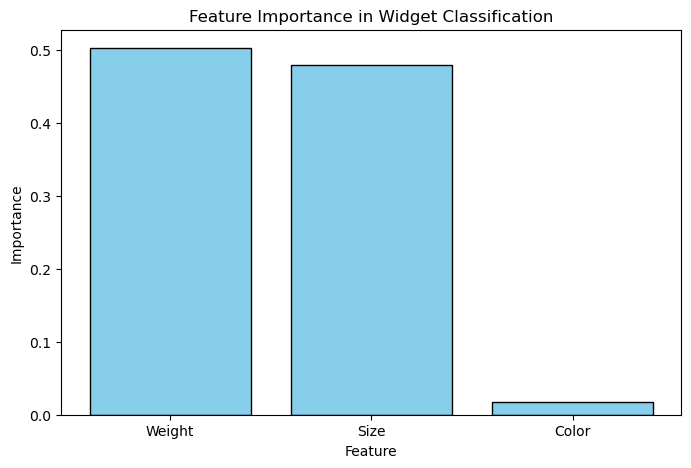

In [28]:
# Visualize feature importance
feature_importances = classifier.feature_importances_
features = ['Weight', 'Size', 'Color']

plt.figure(figsize=(8, 5))
plt.bar(features, feature_importances, color='skyblue', edgecolor='black')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance in Widget Classification')
plt.show()

The code implements a widget classification problem using a Random Forest classifier.
The goal is to classify widgets as either defective or non-defective based on their features.

 Key Steps:
 1. Synthetic data is generated for 1000 widgets, with features including weight, size, and color.
 2. The labels indicate whether a widget is defective (0) or non-defective (1).
 3. The dataset is split into training and testing sets using an 80-20 split.
 4. A Random Forest Classifier is trained on the training set to learn the relationship between features and labels.
 5. Predictions are made on the test set, and the model's performance is evaluated using a confusion matrix and classification report.
 6. Finally, the feature importance is visualized to understand which features contribute most to the classification.